<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#List-of-Tenders-(Ausschreibung)" data-toc-modified-id="List-of-Tenders-(Ausschreibung)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>List of Tenders (Ausschreibung)</a></span></li><li><span><a href="#Result-of-Tenders-(Abgegebene-Angebote-/-Allocated-SRL)" data-toc-modified-id="Result-of-Tenders-(Abgegebene-Angebote-/-Allocated-SRL)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Result of Tenders (Abgegebene Angebote / Allocated SRL)</a></span></li><li><span><a href="#Activated-Control-Reserve-from-regelleistungen.net" data-toc-modified-id="Activated-Control-Reserve-from-regelleistungen.net-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Activated Control Reserve from regelleistungen.net</a></span></li><li><span><a href="#Validate-Activated-Control-Reserve-Numbers" data-toc-modified-id="Validate-Activated-Control-Reserve-Numbers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Validate Activated Control Reserve Numbers</a></span></li><li><span><a href="#Clearing-Prices-of-Secondary-Reserve" data-toc-modified-id="Clearing-Prices-of-Secondary-Reserve-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clearing Prices of Secondary Reserve</a></span></li><li><span><a href="#SMARD-Data" data-toc-modified-id="SMARD-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SMARD Data</a></span><ul class="toc-item"><li><span><a href="#Average-activated-price-vs-clearing-price" data-toc-modified-id="Average-activated-price-vs-clearing-price-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Average activated price vs clearing price</a></span></li></ul></li></ul></div>

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import loader

# List of Tenders (Ausschreibung)

__Use for bidding time for agent__

In [3]:
df_tenders = pd.read_csv("../data/raw/balancing/tenders_2016_2017.csv", sep=';', index_col=False,
                         dayfirst=True, parse_dates=[0, 1, 2, 3, 4], infer_datetime_format=True, decimal=',')
df_tenders = df_tenders[['DATE_FROM', 'DATE_TO', 'GATE_OPEN_TIME',
                         'GATE_COSURE_TIME', 'PRODUCT', 'TOTAL_DEMAND_[MW]']]
df_tenders.columns = ['from', 'to', 'gate_opening',
                      'gate_closure', 'product', 'demand_mw']
df_tenders.head(10)

,from,to,gate_opening,gate_closure,product,demand_mw
0,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,NEG_HT,2500
1,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,NEG_NT,2500
2,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,POS_HT,2500
3,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,POS_NT,2500
4,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,NEG_HT,1979
5,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,NEG_NT,1979
6,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,POS_HT,2054
7,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,POS_NT,2054
8,2016-01-11,2016-01-17,2015-12-30 12:00:00,2016-01-05 15:00:00,NEG_HT,1979
9,2016-01-11,2016-01-17,2015-12-30 12:00:00,2016-01-05 15:00:00,NEG_NT,1979


# Result of Tenders (Abgegebene Angebote / Allocated SRL)

Double checked with e.g. 
- https://www.smard.de/blueprint/servlet/page/home/marktdaten/78?marketDataAttributes=%7B%22resolution%22:%22week%22,%22region%22:%22DE%22,%22from%22:1509490800000,%22to%22:1512945900000,%22moduleIds%22:%5B18000422,18000423%5D,%22selectedCategory%22:null,%22activeChart%22:true,%22language%22:%22de%22%7D#chart-legend

**Caution: When aggregating take into account not to sum up HT and NT!**

In [4]:
df_results = pd.read_csv("../data/processed/tender_results.csv",
                         parse_dates=[0, 1], infer_datetime_format=True)

df_results[(df_results["from"] == '2017-10-23') & (df_results["product_type"] == 'NEG') &
           (df_results["product_time"] == 'HT')].sort_values(['energy_price_mwh'], ascending=False)

,from,to,capacity_price_mw,energy_price_mwh,offered_mw,allocated_mw,product_type,product_time,cumsum_allocated_mw
46261,2017-10-23,2017-10-29,0.98,17.100,5,5,NEG,HT,5
46262,2017-10-23,2017-10-29,3.00,17.000,30,30,NEG,HT,35
46263,2017-10-23,2017-10-29,1.25,16.750,35,35,NEG,HT,70
46264,2017-10-23,2017-10-29,0.50,16.750,5,5,NEG,HT,75
46265,2017-10-23,2017-10-29,0.75,16.750,5,5,NEG,HT,80
46266,2017-10-23,2017-10-29,1.00,16.750,40,40,NEG,HT,120
46267,2017-10-23,2017-10-29,1.50,16.750,35,35,NEG,HT,155
46268,2017-10-23,2017-10-29,0.00,16.400,5,5,NEG,HT,160
46269,2017-10-23,2017-10-29,1.00,14.720,6,6,NEG,HT,166
46270,2017-10-23,2017-10-29,10.00,14.300,65,65,NEG,HT,231


# Activated Control Reserve from regelleistungen.net

In [5]:
df_activated = pd.read_csv("../data/processed/activated_control_reserve.csv",
                           parse_dates=[0], infer_datetime_format=True)
df_activated.head(10)

,from,to,neg_mw,pos_mw
0,2016-01-01 00:00:00,2016-01-01 00:15:00,410.975,2.539
1,2016-01-01 00:15:00,2016-01-01 00:30:00,55.032,22.449
2,2016-01-01 00:30:00,2016-01-01 00:45:00,4.382,253.844
3,2016-01-01 00:45:00,2016-01-01 01:00:00,10.581,71.016
4,2016-01-01 01:00:00,2016-01-01 01:15:00,14.533,104.270
5,2016-01-01 01:15:00,2016-01-01 01:30:00,13.878,72.554
6,2016-01-01 01:30:00,2016-01-01 01:45:00,27.014,17.797
7,2016-01-01 01:45:00,2016-01-01 02:00:00,53.210,5.589
8,2016-01-01 02:00:00,2016-01-01 02:15:00,3.614,285.523
9,2016-01-01 02:15:00,2016-01-01 02:30:00,11.799,75.228


# Validate Activated Control Reserve Numbers

_"Laut Monitoring-Bericht 2017 der Bundesnetzagentur betrug im Jahr 2016 die abgerufene Energiemenge in der negativen Sekundärreserve (SRL) 0,7 TWh sowie 1,4 TWh für die positive SRL"_

-- https://www.next-kraftwerke.de/wissen/regelenergie

-- https://www.smard.de/blueprint/servlet/page/home/marktdaten/78?marketDataAttributes=%7B%22resolution%22:%22year%22,%22region%22:%22DE%22,%22from%22:1451602800000,%22to%22:1514846700000,%22moduleIds%22:%5B18000427,18000426%5D,%22selectedCategory%22:18,%22activeChart%22:true,%22language%22:%22de%22%7D#chart-legend

Also shows this

In [6]:
# Aggregated activated is in 15-min intervals of Capacity in MW, divide by 4 to get Amount of used energy TWh
activated_neg_2016 = df_activated[df_activated["from"] < datetime(
    2017, 1, 1)].neg_mw.sum() / 1000000 / 4
activated_pos_2016 = df_activated[df_activated["from"] < datetime(
    2017, 1, 1)].pos_mw.sum() / 1000000 / 4

print('Activated Control Reserve 2016 - Negative : %.2f TWh Positive %.2f TWh' %
      (activated_neg_2016, activated_pos_2016))

Activated Control Reserve 2016 - Negative : 0.71 TWh Positive 1.41 TWh


# Clearing Prices of Secondary Reserve

__Calculated assumed 15-min clearing prices for negative control reserve by looking at actual activated reserve__

In [7]:
df_clearing_prices = loader.load_balancing_prices()
df_clearing_prices.head()

,product_time,clearing_price_mwh
0,2016-01-01 00:00:00,-96.0
1,2016-01-01 00:15:00,-25.0
2,2016-01-01 00:30:00,-2.5
3,2016-01-01 00:45:00,-13.0
4,2016-01-01 01:00:00,-13.0


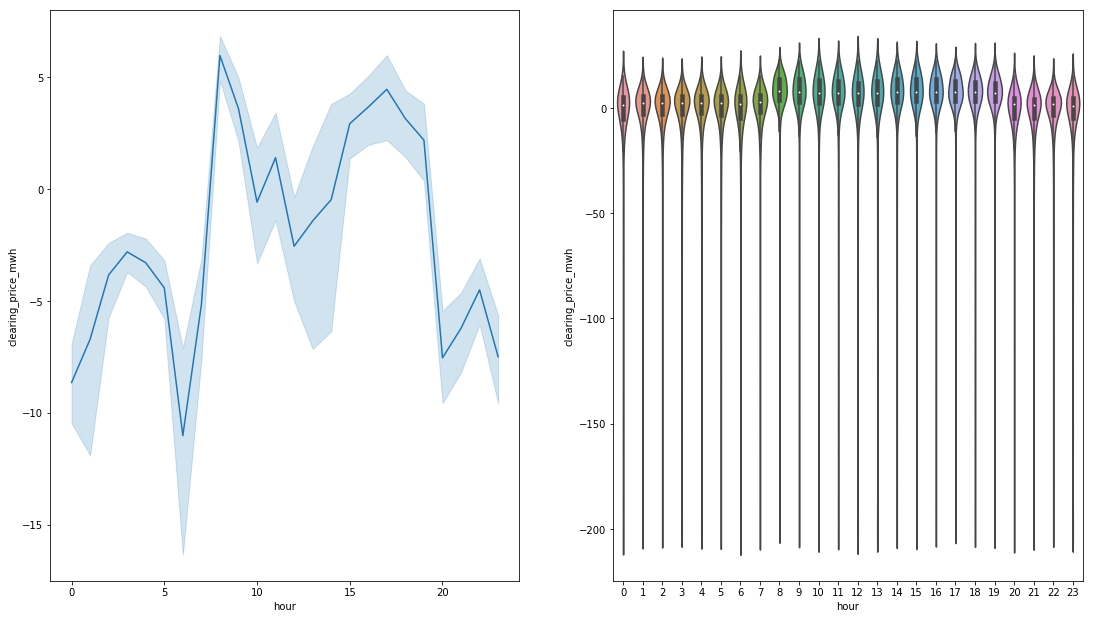

In [8]:
df_clearing_prices["hour"] = df_clearing_prices["product_time"].dt.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)

sns.lineplot(x="hour", y="clearing_price_mwh", data=df_clearing_prices, ax=ax1)

df_clearing_prices["clearing_price_mwh"] = df_clearing_prices["clearing_price_mwh"].clip(-200,200)
sns.violinplot(x="hour", y="clearing_price_mwh", data=df_clearing_prices, ax=ax2);

# SMARD Data

SMARD: _Für die Sekundärregelung vorgehaltene Leistung bzw. Menge [MW], der durchschnittliche Leistungspreis der bezuschlagten Angebote [€/MW], die durchschnittlich abgerufene Leistung bzw. Menge [MWh] und der durchschnittliche Arbeitspreis aller jeweils aktivierten Angebote [€/MWh]_

In [9]:
df_smard = pd.read_csv("../data/raw/balancing/smard_activated_srl_2016_2017.csv", sep=';', index_col=False,
                         dayfirst=True, parse_dates=[0], infer_datetime_format=True)
df_smard.columns=["date", "time", "acitvated_pos_mwh", "activated_neg_mwh", "energy_price_pos", "energy_price_neg", "allocated_pos_mw", "allocated_neg_mw", "capacity_price_pos", "capacity_price_neg"]

# Merge date and time columns
df_smard["date"] = pd.to_datetime(
    df_smard["date"].astype(str)
    + " "
    + df_smard["time"].astype(str)
)

df_smard.drop("time", axis=1, inplace=True)
df_smard.head()

/home/morty/uni/evsim/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,acitvated_pos_mwh,activated_neg_mwh,energy_price_pos,energy_price_neg,allocated_pos_mw,allocated_neg_mw,capacity_price_pos,capacity_price_neg
0,2016-01-01 00:00:00,0.25,103.25,49.05,-41.94,2500,2500,951.68,1273.95
1,2016-01-01 00:15:00,7.00,15.25,52.08,-19.79,2500,2500,951.68,1273.95
2,2016-01-01 00:30:00,64.75,2.50,58.69,-7.91,2500,2500,951.68,1273.95
3,2016-01-01 00:45:00,18.75,4.00,53.66,-9.79,2500,2500,951.68,1273.95
4,2016-01-01 01:00:00,27.00,4.50,54.42,-10.67,2500,2500,951.68,1273.95


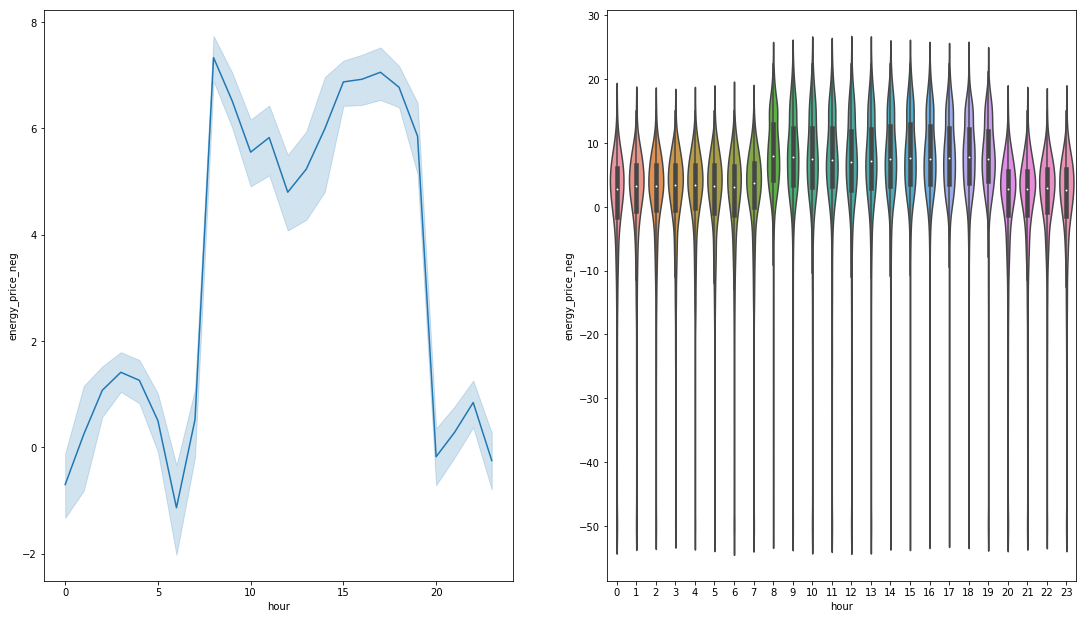

In [10]:
df_smard["hour"] = df_smard["date"].dt.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)

sns.lineplot(x="hour", y="energy_price_neg", data=df_smard, ax=ax1)

df_smard["energy_price_neg"] = df_smard["energy_price_neg"].clip(-50, 200)
sns.violinplot(x="hour", y="energy_price_neg", data=df_smard, ax=ax2);

In [11]:
# Difference between AVERAGE Smard data and clearing price
df_smard.groupby("hour")["energy_price_neg"].mean() - df_clearing_prices.groupby("hour")["clearing_price_mwh"].mean()

hour
0     6.472646
1     4.338863
2     4.060214
3     4.040454
4     4.273558
5     4.687409
6     6.250845
7     4.080564
8     1.292342
9     2.251805
10    3.534739
11    2.914629
12    4.771196
13    3.582139
14    2.689152
15    2.899571
16    2.279143
17    1.640396
18    2.476895
19    2.433764
20    5.719386
21    5.288613
22    4.348616
23    5.655049
dtype: float64

## Average activated price vs clearing price

- Average price for activated energy is higher than clearing price. 
- TSO wants the provider to pay higher prices
- If we bid _higher_ than clearing price our bid will get accepted!